In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='X1', ylabel='X2'>

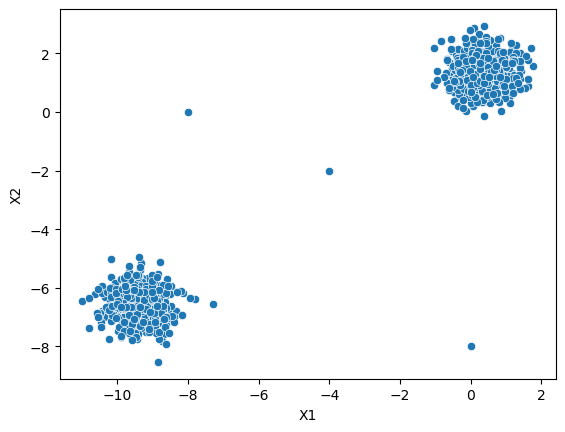

In [2]:
blobs=pd.read_csv('cluster_two_blobs_outliers.csv')
sns.scatterplot(data=blobs , x='X1' , y='X2')

In [3]:
def display_label(model , data):
    labels=model.fit_predict(data)
    sns.scatterplot(data=data , x='X1' , y='X2' , hue=labels , palette='Set1')

### اگر اپسیلون (شعاع دایره)خیلی کوچک باشد باعث می شود که همه داده ها بعنوان داده پرت شناسایی شوند و در هیچ خوشه ای دسته بندی نشوند

### اما اگر اپسیلون خیلی بزرگ باشد باعث می شود همه ی داده ها در یک خوشه دسته بندی شوند 

In [4]:
from sklearn.cluster import DBSCAN
num_outleyar=[]
perc_outleyar=[]
for eps in np.linspace(0.001 , 10 , 100):
    db_model=DBSCAN(eps=eps)
    db_model.fit(blobs)
    # log num of outliyer
    num_outleyar.append(np.sum(db_model.labels_==-1))
    # log percentage of outliyer
    perc_out=100* (np.sum(db_model.labels_==-1)/len(db_model.labels_))
    perc_outleyar.append(perc_out)

(0.0, 1.0)

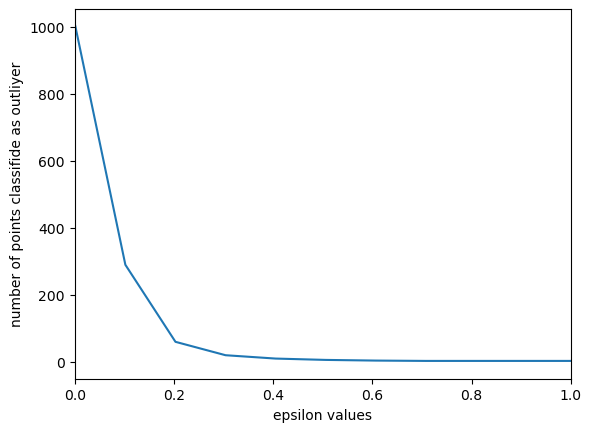

In [5]:
sns.lineplot(x=np.linspace(0.001 , 10 , 100) , y=num_outleyar)
plt.xlabel('epsilon values')
plt.ylabel('number of points classifide as outliyer')
plt.xlim(0,1)

(0.0, 5.0)

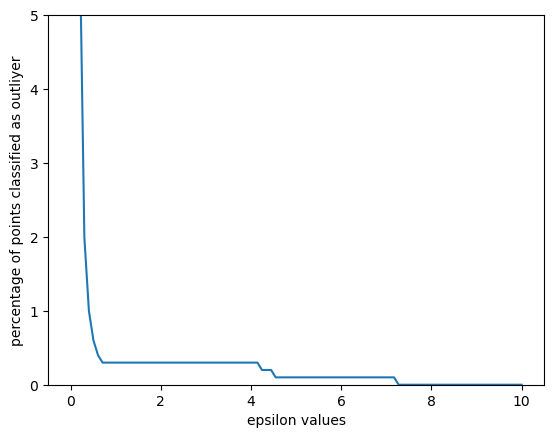

In [6]:
sns.lineplot(x=np.linspace(0.001,10,100) , y=perc_outleyar)
plt.xlabel('epsilon values')
plt.ylabel('percentage of points classified as outliyer')
plt.ylim(0,5)

# محاسبه اپسیلون بر اساس درصد داده های پرت

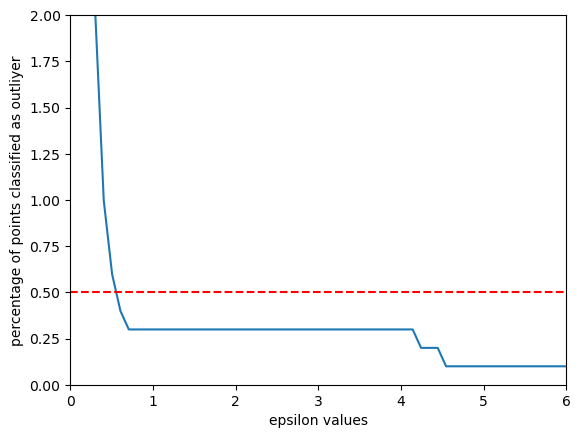

In [7]:
sns.lineplot(x=np.linspace(0.001,10,100) , y=perc_outleyar)
plt.xlabel('epsilon values')
plt.ylabel('percentage of points classified as outliyer')
plt.xlim(0,6)
plt.ylim(0,2)
plt.hlines(y=0.5 , xmin=0 , xmax=6 , colors='red' , ls='--')

## تعیین مقدار اپسیلون بر اساس درصد داده پرت

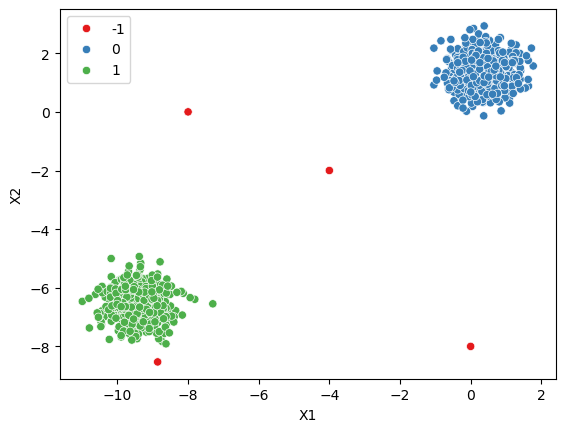

In [19]:
model = DBSCAN(eps=0.6)
display_label(model , blobs)

In [9]:
np.unique(model.labels_)

array([-1,  0,  1], dtype=int64)

In [10]:
np.sum(model.labels_==-1)

4

# محاسبه اپسیلون بر اساس تعداد داده های پرت

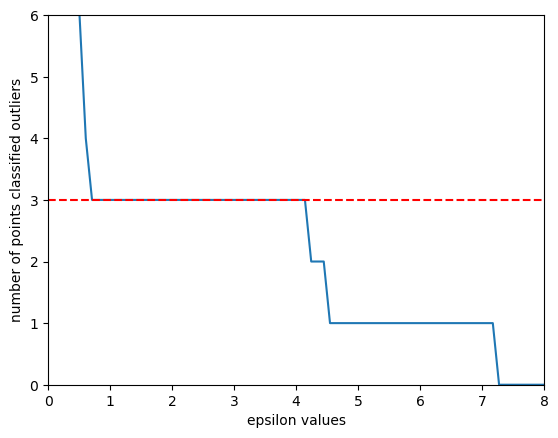

In [13]:
sns.lineplot(x=np.linspace(0.001 , 10 , 100) , y=num_outleyar)
plt.xlabel('epsilon values')
plt.ylabel('number of points classified outliers')
plt.ylim(0,6)
plt.xlim(0,8)
plt.hlines(y=3 , colors='red' , xmin=0 , xmax=8 , ls='--')

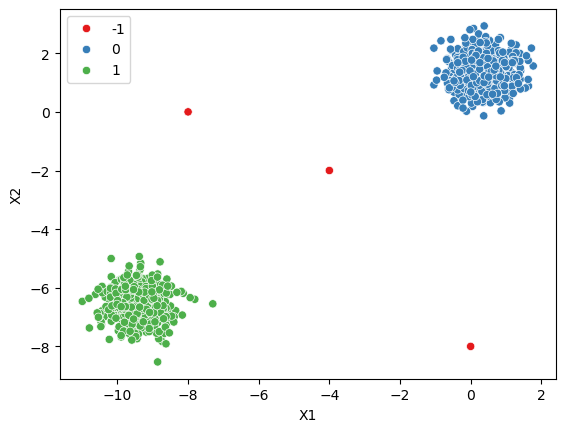

In [15]:
model=DBSCAN(eps=0.7)
display_label(model , blobs)

# set minimum samples

In [11]:
num_outlier=[]
perc_outlier=[]
for num in range(1,100):
    db_model=DBSCAN(min_samples=num)
    db_model.fit(blobs)

    num_outlier.append(np.sum(db_model.labels_==-1))
    perc_outlier.append(100* (np.sum(db_model.labels_==-1)/len(db_model.labels_)))

## هر چه تعداد پارامتر(min_samples) حداقل نقاط موجود در یک خوشه را کمتر در نظر بگیریم داده ها راحت تردر یک خوشه قرار می گیرند اما هر چه این عدد بزرگ تر باشد داده های بیشتری به داده پرت تبدیل می شوند

Text(0, 0.5, 'number of points classified outlier')

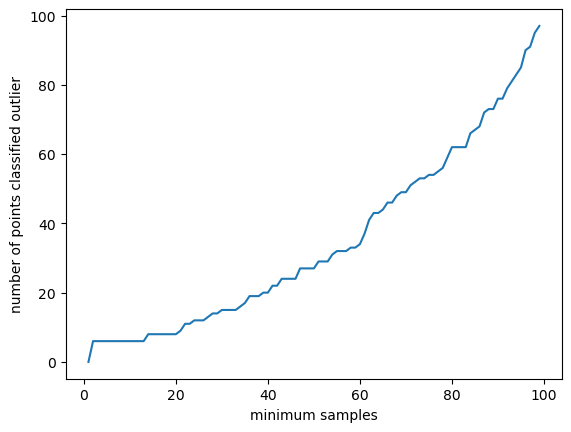

In [12]:
sns.lineplot(x=range(1,100) , y=num_outlier)
plt.xlabel('minimum samples')
plt.ylabel('number of points classified outlier')

Text(0, 0.5, 'percentage of points classified outlier')

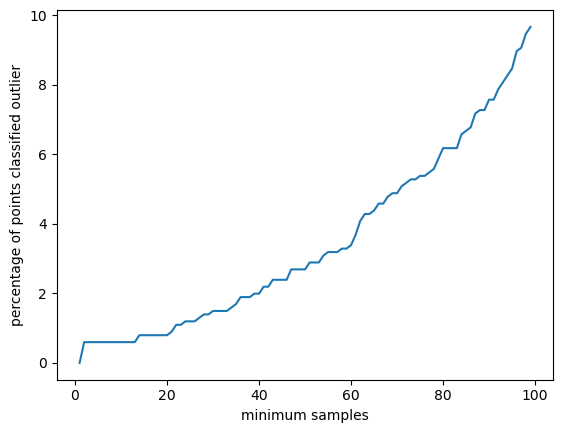

In [13]:
sns.lineplot(x=range(1,100) , y=perc_outlier)
plt.xlabel('minimum samples')
plt.ylabel('percentage of points classified outlier')

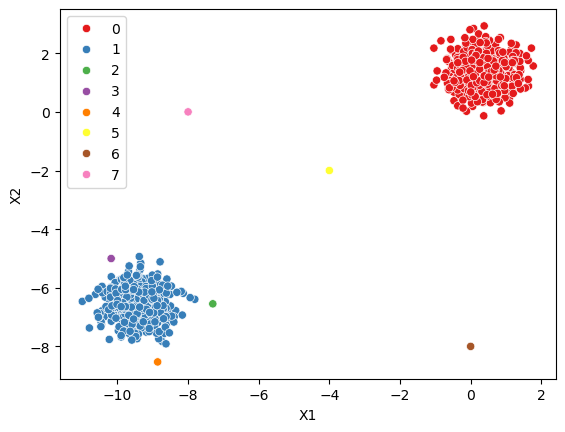

In [14]:
model=DBSCAN(min_samples=1)
display_label(model , blobs)

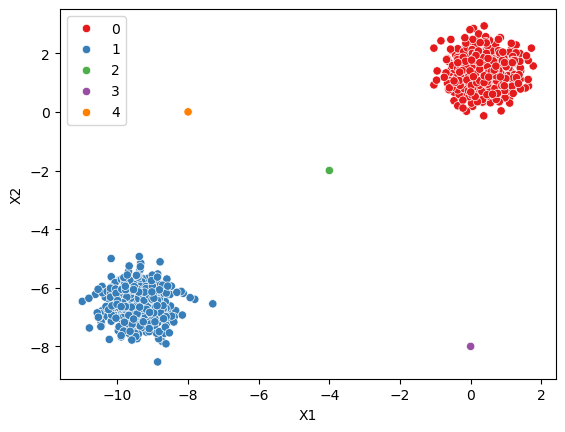

In [24]:
# وقتی حداقل نقاط را کم در نظر بگیریم حتی اگر مقدار اپسیلون درست باشد دیگر داده پرت نداریم بلکه بعنوان خوشه مجزا درنظر گرفته می شود
model=DBSCAN(min_samples=1 , eps=0.75)
display_label(model, blobs)

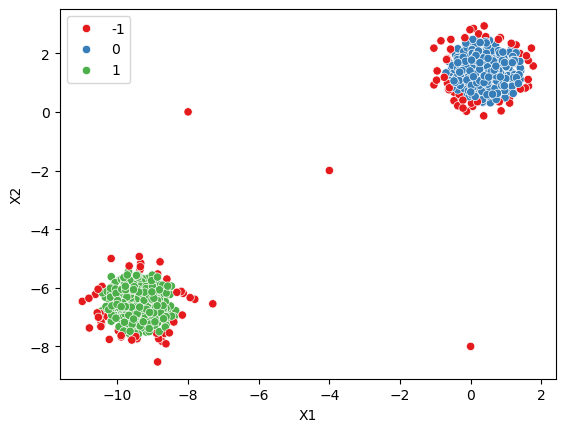

In [16]:
model=DBSCAN(min_samples=100)
display_label(model , blobs)

In [20]:
#بهترین مقدار حداقل نقاط موجود در یک خوشه دو برابر تعداد ویژگی هاست
blobs.shape[1]

2

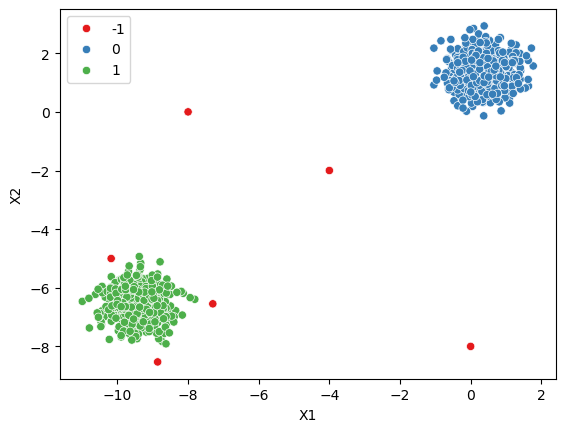

In [21]:
model=DBSCAN(min_samples=4)
display_label(model , blobs)

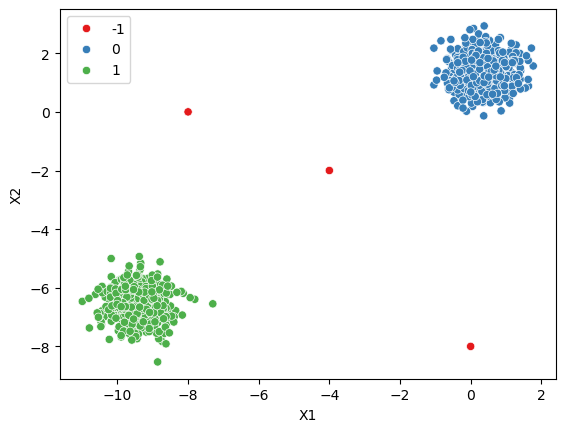

In [22]:
model=DBSCAN(min_samples=4 , eps=0.75)
display_label(model , blobs)